<a href="https://colab.research.google.com/github/destiny-park/DataAnalysis/blob/main/Scikit_learn_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅분기 문제 해결을 위한 사이킷런 모듈 정리**

url =https://scikit-learn.org/stable/modules/classes.html#module


In [ ]:
#모듈 이용
#from import를 이용하여 사용하고자 하는 모듈만 import 합니다.

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [ ]:
#세부 카테고리 검색
#중간 가지의 모듈들 정도는 암기하고, dir 함수를 이용하여 세부 카테고리 검색
import sklearn.model_selection
dir(sklearn.model_selection)[:5]

['BaseCrossValidator',
 'BaseShuffleSplit',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit']

In [ ]:
#all을 이용한 탐색
#import sklearn만 진행한 후 __all__을 이용해서 하위 모듈 확인

import sklearn
sklearn.__all__[-15:-10]

['neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised']

In [ ]:
import sklearn.preprocessing
sklearn.preprocessing.__all__[:6]

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder']

# **모듈 리스트**


```
sklearn
│
├── 01 preprocessing (전처리)
│   │
│   ├── 스케일러
│   │   ├── MinMaxScaler
│   │   ├── RobustScaler
│   │   └── StandardScaler
│   │
│   └── 인코더
│       ├── LabelEncoder
│       └── OneHotEncoder
│  
├── 02 model_selection (모델링 전처리)
│   │
│   ├── 데이터셋 분리
│   │   ├── KFold
│   │   ├── StratifiedKFold
│   │   └── train_test_split
│   │
│   └── 하이퍼파라미터 튜닝
│       └── GridSearchCV
│
├── 03 모델학습
│   │
│   ├── ensemble
│   │   ├── AdaBoostClassifier
│   │   ├── GradientBoostingClassifier
│   │   ├── RandomForestClassifier
│   │   └── RandomForestRegressor
│   │
│   ├── linear_model
│   │   ├── LogisticRegression
│   │   └── RidgeClassifier
│   │
│   ├── neighbors
│   │   └── KNeighborsClassifier
│   │
│   ├── svm
│   │   ├── SVC
│   │   └── SVR
│   │
│   └── tree
│       ├── DecisionTreeClassifier
│       ├── DecisionTreeRegressor
│       ├── ExtraTreeClassifier
│       └── ExtraTreeRegressor
│
├── 04 모델평가
│   │
│   ├── metrics
│   │   ├── accuracy_score
│   │   ├── classification_report
│   │   ├── confusion_matrix
│   │   ├── f1_score
│   │   ├── log_loss
│   │   ├── mean_absolute_error
│   │   ├── mean_squared_error
│   │   └── roc_auc_score
│   │
│   └── model (정의된 모델에서 추출)
│       ├── predict
│       └── predict_proba
│
└── 05 최종앙상블
    │
    └── ensemble
        ├── StackingClassifier
        ├── StackingRegressor
        ├── VotingClassifier
        └── VotingRegressor
```



# **01 데이터 전처리**



## MinMaxScaler

데이터 설명 : 비행탑승 경험 만족도

x_train: 'https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv'

x_test: 'https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv'

출처 (참고, 데이터 수정)

In [ ]:
import pandas as pd

train = pd.read_csv(r'https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv')
test = pd.read_csv(r'https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv')
display(train.head(5))

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN
2,3,Male,Loyal Customer,59,Business travel,Business,2962,0,4,0,...,1,1,1,1,5,1,4,54,46.0,NaN
3,4,Male,Loyal Customer,35,Business travel,Eco Plus,106,5,4,4,...,5,2,1,5,4,4,5,130,121.0,NaN
4,5,Female,Loyal Customer,9,Business travel,Business,2917,3,3,3,...,4,4,4,5,4,3,4,0,0.0,NaN


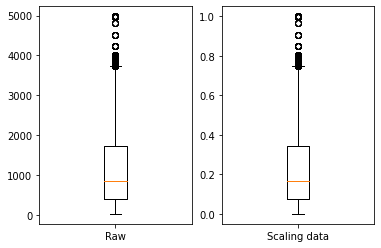

In [ ]:
#1. train 데이터의 Flight Distance 컬럼을 사이킷런 모듈을 이용하여
#최솟값을 0, 최댓값을 1로 하는 데이터로 변환하고,
#scaling을 이름으로 하는 컬럼으로 데이터프레임에 추가하라

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(train['Flight Distance'].values.reshape(-1,1))

scalingdata = mm.transform(train['Flight Distance'].values.reshape(-1,1))
train['scaling'] = scalingdata

##결과 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].boxplot(train['Flight Distance'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train['scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Scaling data'])
plt.show()

#분포는 바뀌지 않음

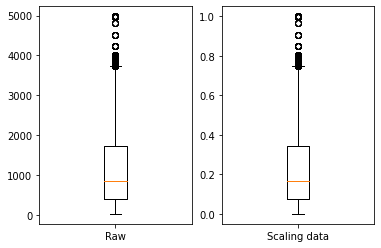

In [ ]:
#2. train 데이터의 Flight Distance 컬럼을 pandas 내장함수만을 이용하여
#최댓값을 0, 최소값을 1로하는 데이터로 변환하고, scaling 컬럼으로 추가하라

min = train["Flight Distance"].min()
max = train["Flight Distance"].max()

train['scaling'] = (train['Flight Distance']-min)/(max-min)

#결과 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].boxplot(train["Flight Distance"])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train["scaling"])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Scaling data'])
plt.show() 

In [ ]:
#3. train 데이터의 Age 컬럼을 MinMax 스케일링 진행하고, 
#age_scaling 컬럼에 추가한 뒤, train 셋과 같은 기준으로 test 데이터의
#Age를 스케일링하여 age_scaling에 추가하라

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(train['Age'].values.reshape(-1,1))

train['age_scaling'] = mm.transform(train['Age'].values.reshape(-1,1))
test['age_scaling'] = mm.transform(test['Age'].values.reshape(-1,1))

display(test[['ID','age_scaling']].head(3))

#아래와 같이 축약 가능
train['age_scaling'] = mm.fit_transform(train["Age"].values.reshape(-1,1))
test['age_scaling'] = mm.transform(test['Age'].values.reshape(-1,1))

display(test[["ID","Age","age_scaling"]].head(5))



,ID,age_scaling
0,1,0.269231
1,16,0.346154
2,17,0.205128


,ID,Age,age_scaling
0,1,28,0.269231
1,16,34,0.346154
2,17,23,0.205128
3,25,55,0.615385
4,27,44,0.474359


## Standard Scaler

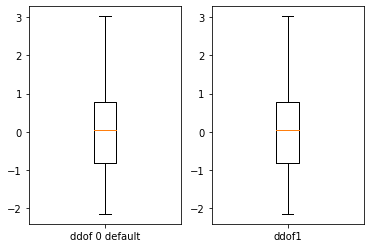

,scaling
count,83123.000000
mean,0.000000
std,1.000000
min,-2.142709
25%,-0.818424
50%,0.042361
75%,0.770717
max,3.022001
,scaling_ddof0
count,83123.000000


In [ ]:
#4. train 데이터의 Age 컬럼을 pandas 기본 내장 모듈을 이용하여 정규화 스케일링을 진행하고,
# age_scaling 컬럼에 추가하라

mean = train["Age"].mean()
std = train["Age"].std()

train["age_scaling"] = (train["Age"]-mean)/std

#자유도에 따른 차이 확인
scaling_ddof1 = (train["Age"]-train['Age'].mean())/(train["Age"].std())
train['scaling'] = scaling_ddof1

scaling_ddof0 = (train["Age"]-train['Age'].mean())/(train["Age"].std(ddof=0))
train['scaling_ddof0'] = scaling_ddof0

##그래프 그리기
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].boxplot(train["scaling"])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['ddof 0 default'])
ax[1].boxplot(train["scaling_ddof0"])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['ddof1'])
plt.show() 

#표 그리기
from IPython.display import display_html

df1 = train[['scaling']].describe()
df2 = train[['scaling_ddof0']].describe()

df1_styler = df1.style.set_table_attributes("style = 'display:inline'").set_caption('Caption table 1')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption("Caption table 2")

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(),raw=True)


,ID,age_scaling
0,1,-0.752215
1,16,-0.354927
2,17,-1.083288


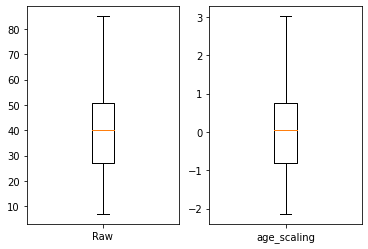

In [ ]:
#5. train 데이터의 Age 컬럼을 sklearn 모듈을 이용하여 정규화 스케일링을 진행하고,
#age_scaling 컬럼에 추가하고, train 셋과 같은 기준으로 Age를 스케일링하여 age_scaling에 추가하라

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train['Age'].values.reshape(-1,1))

train['age_scaling'] = sc.transform(train['Age'].values.reshape(-1,1))
test['age_scaling'] = sc.transform(test['Age'].values.reshape(-1,1))

display(test[['ID','age_scaling']].head(3))

#짧게 쓰면 아래와 같이 쓸 수 있다.
#sc = StandardScaler()
#train['age_scaling'] = sc.fit_transform(train['Age'].values.reshape(-1,1))
#test['age_scaling'] = sc.transform(test['Age'].values.reshape(-1,1))


##결과 시각화
import matplotlib.pyplot as plt
fix, ax = plt.subplots(1,2)
ax[0].boxplot(train['Age'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train['age_scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['age_scaling'])
plt.show()




## LabelEncoder

문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능을 제공함.
반대로 (라벨) 코드 숫자를 이용하여 원본 값을 구할 수 도 있다.

데이터 설명 : 

이직여부 판단 데이터


train: https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_train.csv


test : https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/y_train.csv

출처 (참고, 데이터 수정)

In [ ]:
import pandas as pd
#데이터 로드
train = pd.read_csv(r'https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_train.csv')
test= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_test.csv')
display(train.head(2))


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,25298,city_138,0.836,Male,No relevent experience,Full time course,High School,NaN,5,100-500,Pvt Ltd,1,45
1,4241,city_160,0.920,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,1,17


In [ ]:
#숫치가 아닌 타입을 Deep Learning에서 다루기 어려움. 
#Label Scaler는 문자를 0부터 시작하는 정수형의 숫자로 변경하는 기능을 함(반대도 가능)

#각 필드의 타입을 확인.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12452 entries, 0 to 12451
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12452 non-null  int64  
 1   city                    12452 non-null  object 
 2   city_development_index  12452 non-null  float64
 3   gender                  9535 non-null   object 
 4   relevent_experience     12452 non-null  object 
 5   enrolled_university     12195 non-null  object 
 6   education_level         12137 non-null  object 
 7   major_discipline        10586 non-null  object 
 8   experience              12415 non-null  object 
 9   company_size            8600 non-null   object 
 10  company_type            8471 non-null   object 
 11  last_new_job            12179 non-null  object 
 12  training_hours          12452 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


In [ ]:
#라벨 인코더 생성
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#train 데이터의 education_level 필드를 이용하여 피팅하고, 라벨을 숫자로 변환
encoder.fit(train['education_level'])

train['level_encoded'] = encoder.transform(train['education_level'])


#test 데이터에 동일한 인코더를 적용하기 위해서는, 
#test 데이터에만 있는 고유값이 있을 수 있으므로 이를 확인해 신규클래스로 추가해야함
import numpy as np
for label in test["education_level"].unique() : 
  if label not in encoder.classes_ : #test의 고유 데이터일 경우
    encoder.classes_ = np.append(encoder.classes_,label)

test['level_encoded'] = encoder.transform(test['education_level'])



In [ ]:
#인코더에 등록된 클래스 조회
print(encoder.classes_)

['Graduate' 'High School' 'Masters' 'Phd' 'Primary School' nan nan]


In [ ]:
#라벨이 인코딩 잘 되어있는지 확인하기
test[['education_level','level_encoded']].head(5)

,education_level,level_encoded
0,Graduate,0
1,Masters,2
2,Graduate,0
3,Graduate,0
4,Masters,2


In [ ]:
#라벨 숫자를 이용하여 문자로 변경하기
encoder.inverse_transform([3,2,1,0])

array(['Phd', 'Masters', 'High School', 'Graduate'], dtype=object)

## OneHotEncoder
단 하나의 값만 True이고, 나머지는 모두 False인 인코딩.
즉, 1개만 Hot(True)이고, 나머지는 Cold(False)

*P.S.
multi-columns에 대해서 작업가능한 pandas의 pd.get_dummies가 더 좋음


In [ ]:
#앞서 사용한 데이터의 gender 필드에 인코더 적용 예정
train['gender'].unique()

test['gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [ ]:
#OneHotEncoding 적용하기
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

#train 데이터로 fit
encoder.fit(train['gender'])

train['gender_OneHot'] = encoder.transform(train['gender'])

train['gender_OneHot'].head(5)


ValueError: ignored

# **02 모델링 전처리**

## train_test_split

데이터 설명 : 투약하는 약을 분류 (종속변수 :Drug) 

x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_train.csv 

y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_train.csv

In [ ]:
import pandas as pd
x = pd.read_csv(r'https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_train.csv')
y = pd.read_csv(r'https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_train.csv')[['Drug']]
display(x.head(2))
display(y.head(2))

,ID,Age,Sex,BP,Cholesterol,Na_to_K
0,0,36,F,NORMAL,HIGH,16.753
1,1,47,F,LOW,HIGH,11.767


,Drug
0,0
1,3


In [ ]:
#6. xy데이터에서 train,test 세트를 구분하고 train셋의 y값과 test셋의 y 값의 unique한 
# value값의 숫자를 출력하라. train:test는 7:3의 비율, random_state=42로 고정

#train_test_split : 학습 데이터와 테스트 세트를 분리함.
#파라미터 설명 :
# test_size : 테스트 셋의 구성 비율, 0.3은 전체 데이터의 30%를 test로 하겠음. (default=0.25)
# suffle : split 전 섞을 것인지 말지 .(default=True)
# stratify : 파라미터의 값을 target으로 지정 시, class의 비율을 train/validation에 유지해줌. 한쪽에 쏠려서 분배되는 것을 방지 (default=None)
# random_state : 세트를 섞을 때 해당 값을 보고 섰음. 튜닝시 이 값을 고정하고 튜닝해야 데이터가 매번 변경되는 것을 방지

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

y.columns = ['Class']
t = pd.concat([y_train.value_counts(),y_test.value_counts()],axis=1).rename(columns={0:'train',1:'test'}).reset_index()
t



,Class,train,test
0,0,54,18
1,1,13,5
2,2,8,4
3,3,5,7
4,4,29,14


In [ ]:
#7. x,y 데이터에서 train, test세트를 구분하고, train셋의 y값과 test셋의 y값을
# unique한 value값의 비율을 동일하게 추출하라. 7:3의 비율, random_state=42로 고정

X_test, X_train, y_test, y_train = train_test_split(x,y,test_size=0.3,random_state=42)

y.columns=['Class']
t = pd.concat([y_train.value_counts(),y_test.value_counts()],axis=1).rename(columns={0:'train',1:'test'}).reset_index()
t

,Class,train,test
0,0,18,54
1,1,5,13
2,2,4,8
3,3,7,5
4,4,14,29


# 03 **모델링**

**모델링 기본 골격**

1.   model import
2.   model 선언, 초기 하이퍼 파라미터 지정
3. model.fit(x_train,y_train)을 통한 모델 학습
4. 회귀, 분류 문제 모두 model.predict(x_validation) 을 통한 예측
5.auc값을 구해야하는 경우 model.predict_proba(x_validation)을 통한 확률 추출 (svm모델의 경우 학습시 probability=True옵션 추가)
6. 원하는 metric으로 모델 평가 eg) accuracy_score(y_validation, model.predict(x_validation))


Tip

---
1. 어떤 모델을 써야할지 잘 모르겠으면 랜덤포레스트 쓰면 중간 이상은 한다. RandomForestClassifier, RandomForestRegeressor

2. 모듈경로를 못외울때는 아래와 같은 방법접근 sklearn 하위 첫번째 모듈까지는 외워야한다.


In [ ]:
import sklearn.ensemble
dir(sklearn.ensemble)[:10]

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier']

## sklearn 학습 모듈 import 모음

분류문제의 경우 - Classifier, 회귀문제의 경우 - Regressor 형식

사이킷런 모듈 버전에 따라 조금씩 다를 수 있음


In [ ]:
#ensemble

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor



#linear_model
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression    # 분류
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier # 분류


#neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsTransformer
from sklearn.neighbors import NearestNeighbors


#svm
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import OneClassSVM
from sklearn.svm import SVR   # regression
from sklearn.svm import SVC   # classfier


#tree
from sklearn.tree import BaseDecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import ExtraTreeRegressor

# **04 모델평가**

In [ ]:
import sklearn.metrics
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 '

# **작업형 2번 전략**

## 1. train, test 데이터
train, test 데이터는 세 개의 파일로 나뉘어 제공됨
- train 데이터 : 학습용 데이터, X_train.csv, y_train.csv
    - 학습 모델을 만들 때 사용
    - 성능 에측을 위해 2개 나누어 사용 또는 GridSearchCV 사용
- test 데이터 : 평가용 데이터, X_test.csv
    - 제출 용도의 파일 작성에 사용
    - train 데이터로 생성된 학습 모델을 사용하여 평가용 파일 작성
- train, test 데이터의 X(입력) Feature
    - 동일한 가공 처리가 되어야 함
    - Feature 순서, 개수가 동일해야함
    - 2차원의 형태이어야 함
- train 데이터의 y(출력, target)은 한개의 column으로 1차원 형태여야함
- train, test 데이터가 서로 섞여서는 안됨
- test 데이터는 그 행의 순서나 개수가 변경되어서는 안됨(shuffle, drop 금지)

## 2. 결측치 (NA)
- ML에 사용되는 데이터는 결측치가 있으면 안됨
- train, test 데이터를 보고 양쪽에 결측치가 있을 경우 채우기 실행
- train 데이터만 결측치가 있을 경우, 삭제/채우기 등 처리 (채우기가 더 나음)